In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy


In [2]:
#filename = "result_energy_sorting.txt"
filename = "result_diagonal_plus_energy.txt"
df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]


In [3]:
new_density = 1.851
T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
factor_2198 = (1./T_2198)*(pow(10,27))
factor_1086 = (1./T_1086)*(pow(10,27))
factor_54 = (1./T_54)*(pow(10,27))

In [4]:
cc_2198_val = []
cc_1086_val = []
cc_54_val = []
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
    dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
    dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))

    cc_2198 = factor_2198*(-math.log(dz_2198))
    cc_1086 = factor_1086*(-math.log(dz_1086))
    cc_54 = factor_54*(-math.log(dz_54))
    cc_2198_val.append(cc_2198)
    cc_1086_val.append(cc_1086)
    cc_54_val.append(cc_54)
    print(cc_1086)

738.542441611539
741.7543145939069
737.2116615878716
702.265185016487


/tmp/ipykernel_17904/3011560152.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_17904/3011560152.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_17904/3011560152.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") 

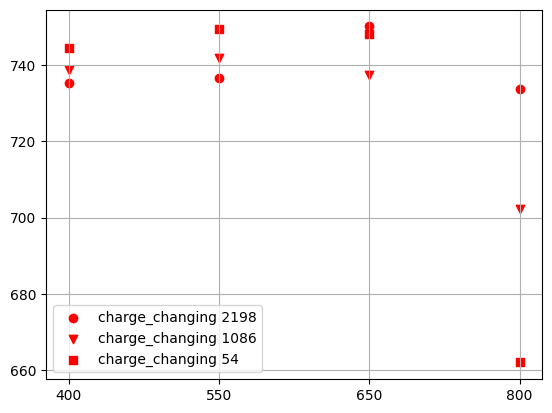

In [5]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_2198_val,label="charge_changing 2198",color='red',marker="o")
ax.scatter(energy_vals,cc_1086_val,label="charge_changing 1086",color ='red',marker="v")
ax.scatter(energy_vals,cc_54_val,label="charge_changing 54",color='red',marker="s")
ax.legend()
ax.grid()